In [2]:
import numpy
from matplotlib import pyplot
%matplotlib inline

# Turbulent boundary layers

## The Tubulent Equation

The turbulent boudnary layer equations on a flat plate are

$$ u \frac{\partial u}{\partial x}+ v \frac{\partial u}{\partial y} = \frac 1\rho \frac{\partial\tau_e}{\partial y} $$

where $u$ is the mean velocity (we've dropped the $\bar u$ notation from class), and the effective stress is

$$ \tau_e = \mu \frac{\partial u}{\partial y}-\rho\overline{u'v'} $$

where $\rho\overline{u'v'}$ is the Reynolds' stress.

---

## Inner velocity profile

Defining the the friction velocity as

$$ u_\tau \equiv \sqrt{\frac{\tau_w}\rho} = U\sqrt{\frac {c_f}2}$$

and the "wall unit" as

$$ y^+ = \frac{u_\tau y}\nu $$

allows us to define the inner velocity profile as

$$ \bar u = u_\tau y^+$$



## Outer velocity profile

On the edge of the boundary layer we have, 

$$ \frac{U}{u_\tau} = \frac 1k \ln\left(\frac{u_\tau \delta}\nu\right)+C $$

Plotting this against experimental data lets us set the emperical coefficients

![log-law profile](resources/log-law.png)

and we see $\frac 1 k = 2.5$ and $C = 5.1$

## Skin friction

Given the definition of $u_\tau$ we can write the left-hand-side and argument of the outer profile as:

$$ \frac{U}{u_\tau} = \sqrt{\frac 2{c_f}},\quad \frac{u_\tau \delta}\nu = \frac{U \delta}\nu \frac{u_\tau}U = Re_\delta \sqrt{\frac {c_f}2}$$

Substituition gives:

$$ \sqrt{\frac 2{c_f}} = \frac 1k \ln\left(Re_\delta \sqrt{\frac {c_f}2}\right)+C$$

which is an implicit equation for $c_f$ which depends on $Re_\delta$. We can plot this by solving for $Re_\delta$ instead of $c_f$

$$ \sqrt{\frac 2{c_f}}\exp{\left(k\sqrt{\frac 2{c_f}}-kC\right)} = Re_\delta  $$

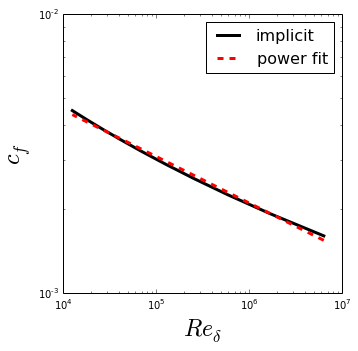

In [3]:
k = 1./2.5
C = 5.1
c_f = numpy.linspace(0.0016,0.0045,10)
root = numpy.sqrt(2./c_f)
Re_d = numpy.exp(k*root-k*C)*root
c_f2 = 0.021*Re_d**(-1./6.)

pyplot.figure(figsize=(5,5))
pyplot.xlabel('$Re_\delta$', fontsize=24)
pyplot.ylabel('$c_f$', fontsize=24)
pyplot.loglog(Re_d,c_f, lw=3, c='k', label='implicit')
pyplot.loglog(Re_d,c_f2, lw=3, ls='--', c='r', label='power fit')
pyplot.legend(loc='upper right', fontsize=16)
pyplot.show()

As shown, a power law 

$$ c_f = 0.021 Re_\delta^{-1/6}$$

fits this fairly well, avoiding the implicit relation.

---

## Length-based prediction

The equation above gives $c_f$ in terms of $Re_\delta$, __but $\delta/x$ is still unknown__. An additional equation is needed to determine the friction as a function of the length-based Re. We use the flat plate momentum integral equation

$$ \frac 12 c_f = \frac{\partial\delta_2}{\partial x} $$

Integrating $u/U$ through the boundary layer gives

$$\frac{\delta_2}{\delta} = c_1\sqrt{\frac{c_f}2}+ c_2 \frac{c_f}2$$

where $c_1$ and $c_2$ are constants. Significant substitution, integration, and simplification gives a new implicit equation

$$ \frac 1{\sqrt{C_F}} = 4.13 \log_{10}\left(C_F Re_L\right) $$

where $C_F$ is the total skin friction drag coefficient

$$ C_F = \frac 1L \int_0^L c_f dx = \frac{\delta_2(L)}{\frac 12 L}$$


---

## Power law profile

In all the focus on $c_f$ you might have missed something important. In the laminar case, $\frac{\delta_2}{\delta}=F$ is a constant because the shape of the profile is constant. But the equation above shows that $\frac{\delta_2}{\delta}$ depends on $c_f$ and therefore $Re$ in a turbulent flow. __The shape of the turbulent profile changes - even for a flat plate!__ This is why the math leading to the implicit equation is so hairy. 

An alternative, we can approximate the profile with a simple equation

$$ \frac uU \approx \eta^{1/n} = \eta^{1/7} $$

where $1/n$ is the power-law for the boundary layer. From the discussion above, its clear that $n$ should depend on $Re$, but in practise $n \approx 7$ gives a fairly good match to low Reynolds number data. This gives the momentum thickness as

$$ \frac{\delta_2}{\delta} = \frac 7{72}$$

obviously not a function of $Re$. Using the estimate $c_f=0.02 Re_\delta^{-1/6}$ and the momentum integral equation gives

$$ Re_\delta^{-1/6} = \frac{2}{0.02}\frac{7}{72}\frac{\partial\delta}{\partial x}$$

$$ Re_\delta = 0.16 Re^{6/7}, \quad \frac\delta x = \frac{0.16}{Re^{1/7}} $$

Susbtitution gives

$$ c_f = \frac{0.027}{Re^{1/7}}, \quad C_F = \frac 76 c_f(L) $$

## Comparisons

Lets compare the power law and implicit equation results to the laminar results:

$$ \frac\delta x = \frac{5}{Re^{1/2}}, \quad c_f = \frac{0.664}{Re^{1/2}}, \quad C_F = 2 c_f(L) $$

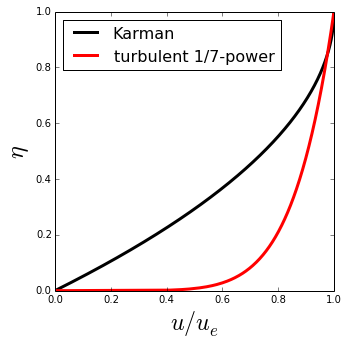

In [4]:
eta = numpy.linspace(0.0,1.0,500)
karman = 2*eta-eta**2
power = eta**(1./7.)

pyplot.figure(figsize=(5,5))
pyplot.xlabel('$u/u_e$', fontsize=24)
pyplot.ylabel('$\eta$', fontsize=24)
pyplot.plot(karman,eta, lw=3, color='k', label='Karman')
pyplot.plot(power,eta, lw=3, color='red', label='turbulent 1/7-power')
pyplot.legend(loc='upper left', fontsize=16)
pyplot.show()

The profiles are shown above. They have an extremely different shape, the turbulent being much sharper near the wall. However, scaling by $\eta$ hides that fact that the boundary layer thickness is greater for a turbulent flow. 

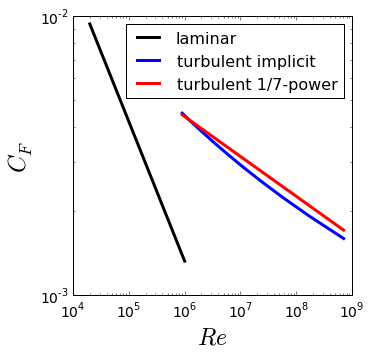

In [9]:
Re = 10.**(1./numpy.sqrt(c_f)/4.13)/c_f
c_f_power = 7./6.*0.027*Re**(-1./7.)

Re_lam = 10**(numpy.linspace(4.3,6,10))
c_f_lam = 2*0.664*Re_lam**(-0.5)

pyplot.figure(figsize=(5,5))
pyplot.xlabel('$Re$', fontsize=24)
pyplot.ylabel('$C_F$', fontsize=24)
pyplot.loglog(Re_lam,c_f_lam, lw=3, c='black', label='laminar')
pyplot.loglog(Re,c_f, lw=3, c='blue', label='turbulent implicit')
pyplot.loglog(Re,c_f_power, lw=3, c='red', label='turbulent 1/7-power')
pyplot.tick_params(axis='both', which='major', labelsize=14)
pyplot.legend(loc='upper right', fontsize=16)
pyplot.show()

The total friction $C_F$ functions are plotted above. Note the extremely large jump in drag coefficient when the boundary layer transitions to turbulence. 

Also, despite the simplicity of the profile law, the agreement is reasonable. The equation in the notes is much less accurate.

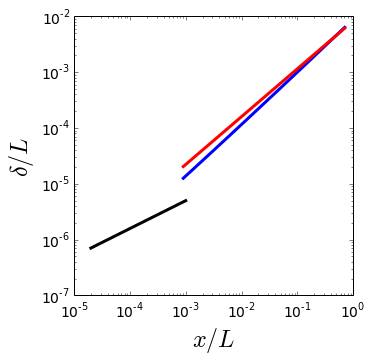

In [8]:
delta = Re_d/Re
delta_power = 0.16*Re**(-1./7.)
delta_lam = 5*Re_lam**(-0.5)

pyplot.figure(figsize=(5,5))
pyplot.xlabel('$x/L$', fontsize=24)
pyplot.ylabel('$\delta/L$', fontsize=24)
pyplot.loglog(Re_lam*1e-9,delta_lam*Re_lam*1e-9, lw=3, c='black', label='laminar')
pyplot.loglog(Re*1e-9,delta*Re*1e-9, lw=3, c='blue', label='turbulent implicit')
pyplot.loglog(Re*1e-9,delta_power*Re*1e-9, lw=3, c='red', label='turbulent 1/7-power')
pyplot.tick_params(axis='both', which='major', labelsize=14)
pyplot.show()

Finally, the boundary layer thickness along the plate is shown above. The boundary layer thickness "jumps" in transition, and grows more quickly in the turbulent region. However, it is still very small compared to the length of the plate. 

The 1/7 power-law gives a reasonable estimate of the turbulent thickness.